# Importing Libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

In [2]:
from warnings import filterwarnings

# Ignore warnings
filterwarnings('ignore')

# Loading Dataset

In [3]:
data = xr.open_dataset('Africa_cru_data.nc')
data

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

# Extracting Precipitation Variable

In [4]:
precipitation = data['pre']
precipitation

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

# Slicing data for Ghana from 2000-2009

In [5]:
ghana = precipitation.sel(
    lat=slice(4.5, 11.5),
    lon=slice(-3.5, 1.5),
    time=slice('2000', '2009')
)

# Count of events where precipitation exceeded 250 mm, grouped by year

In [6]:
ghana_count = ghana.where(ghana > 250).groupby('time.year').count(dim='time')

# Plotting

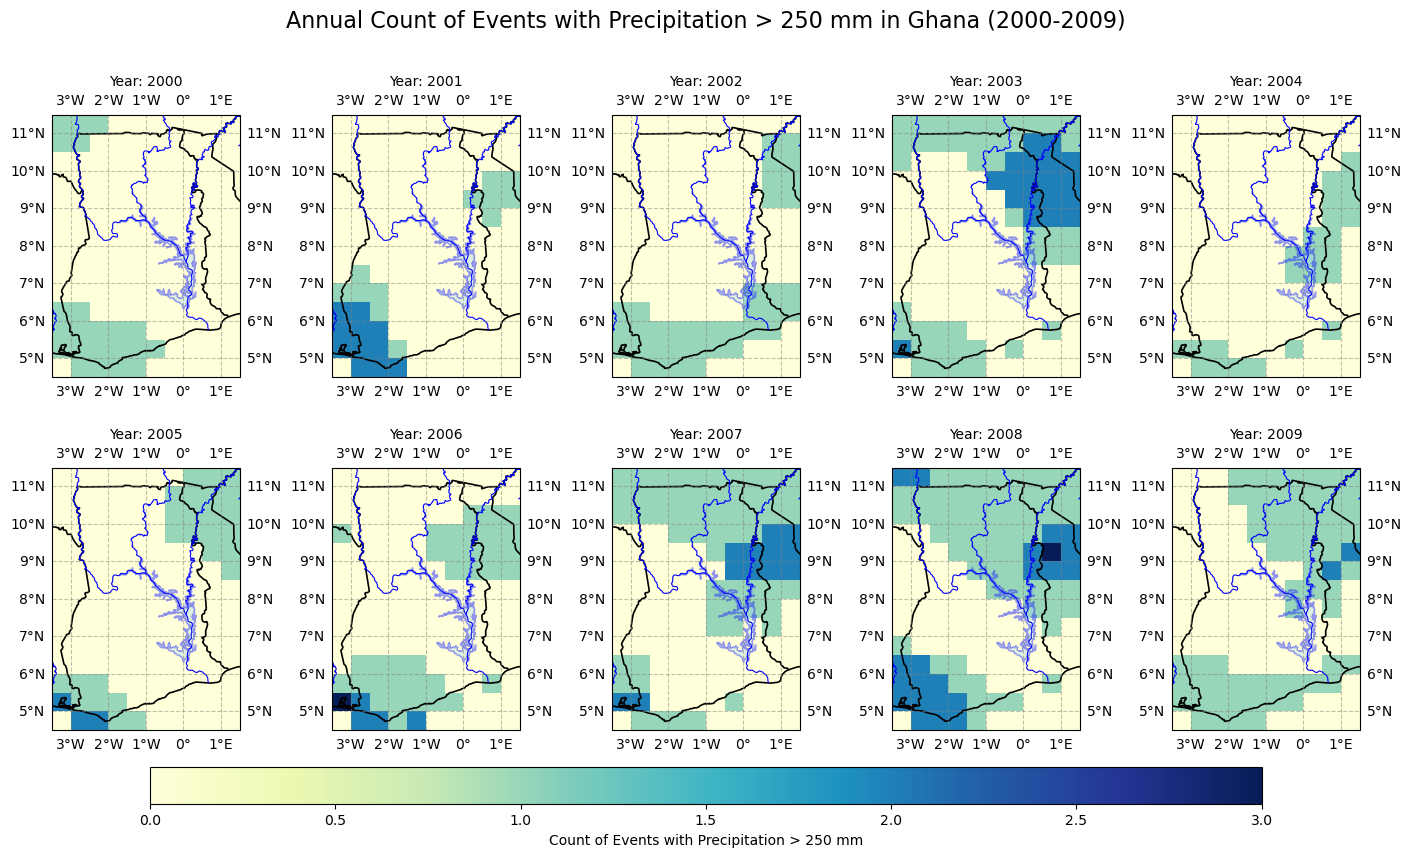

In [8]:
# Map projection used
projection = ccrs.PlateCarree()

# Creation of subplots
fig, axes = plt.subplots(
    nrows=2, ncols=5, figsize=(14, 8),
    subplot_kw={'projection': projection},
    constrained_layout=True
)

# Flattening axes for iteration
axes = axes.flatten()

# Plotting of each year's data
years = ghana_count.year.values
for i, year in enumerate(years):
    ax = axes[i]
    plot = ghana_count.sel(year=year).plot(
        ax=ax, transform=ccrs.PlateCarree(),
        cmap='YlGnBu', vmin=0, vmax=ghana_count.max(),
        add_colorbar=False
    )
    
    ax.set_title(f'Year: {year}', fontsize=10)
    ax.add_feature(cfeature.COASTLINE, linewidth=1.2, edgecolor='black')
    ax.add_feature(cfeature.BORDERS, linewidth=1.2, linestyle='-', edgecolor='black')
    ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue', alpha=0.4)
    ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.8)
    ax.set_extent([-3.5, 1.5, 4.5, 11.5], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)

# Adjusting the spacing of subplots
fig.subplots_adjust(hspace=0.3, wspace=0.15)  # Reduced space for better alignment

# Adding a single colorbar
cbar = fig.colorbar(
    plot, ax=axes, orientation='horizontal', pad=0.02, shrink=0.85,
    aspect=30, label='Count of Events with Precipitation > 250 mm'
)

# Adding a main title to the figure
fig.suptitle('Annual Count of Events with Precipitation > 250 mm in Ghana (2000-2009)', 
             fontsize=16, y=1.05)

# Showing the plot
plt.show()
